# IPL Data Analysis

- Section 01: Match Statistics
- Section 02: Player Statistics
- Section 03: Team Statistics
- Section 04: Venue Statistics

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)


#### Importing Data

In [2]:
deleveries = pd.read_csv("C:\\Users\\Sowmya Surampalli\\Downloads\\IPL+Dataset\\IPL Dataset\\deliveries.csv")
deleveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [3]:
matches = pd.read_csv("C:\\Users\\Sowmya Surampalli\\Downloads\\IPL+Dataset\\IPL Dataset\\matches.csv")
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'home_team'],
      dtype='object')

#### Joining the data sets

In [4]:
overall_data= pd.merge(deleveries,matches,left_on="match_id",right_on="id")

In [5]:
overall_data.columns


Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'season', 'city', 'date', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied',
       'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue',
       'umpire1', 'umpire2', 'umpire3', 'home_team'],
      dtype='object')

## Section 02: Players Statistics

### Orange Cap Holders per Season

In [6]:
batsmen_scores = overall_data[['season','batsman','batsman_runs']].groupby(['season','batsman']).agg({'batsman_runs':sum})
batsmen_scores['batsman_runs'].groupby(level=0, group_keys=False).nlargest(1)

season  batsman     
2008    SE Marsh        616
2009    ML Hayden       572
2010    SR Tendulkar    618
2011    CH Gayle        608
2012    CH Gayle        733
2013    MEK Hussey      733
2014    RV Uthappa      660
2015    DA Warner       562
2016    V Kohli         973
2017    DA Warner       641
Name: batsman_runs, dtype: int64

Below are the Orange cap holders for respective seasons and their respective scores
- 2008  -  SE Marsh        [616]
- 2009  -  ML Hayden       [572]
- 2010  -  SR Tendulkar    [618]
- 2011  -  CH Gayle        [608]
- 2012  -  CH Gayle        [733]
- 2013  -  MEK Hussey      [733]
- 2014  -  RV Uthappa      [660]
- 2015  -  DA Warner       [562]
- 2016  -  V Kohli         [973]
- 2017  -  DA Warner       [641]

### Purple Cap Holders per Season

In [7]:
deleveries.dismissal_kind.value_counts()

caught                   4373
bowled                   1382
run out                   755
lbw                       455
stumped                   243
caught and bowled         211
retired hurt                9
hit wicket                  9
obstructing the field       1
Name: dismissal_kind, dtype: int64

In [8]:
wickets_case_list = ['caught','bowled','run out','stumped','caught and bowled','hit wicket']

In [9]:
overall_data['wickets']=overall_data['dismissal_kind'].apply(lambda x: 1 if x in wickets_case_list else 0)

In [10]:
wicket_scores = overall_data[['season','bowler','wickets']].groupby(['season','bowler']).agg({'wickets':sum})

In [11]:
wicket_scores['wickets'].groupby(level=0,group_keys=False).nlargest(1)

season  bowler       
2008    Sohail Tanvir    21
2009    RP Singh         26
2010    PP Ojha          21
2011    SL Malinga       30
2012    M Morkel         29
2013    DJ Bravo         32
2014    MM Sharma        25
2015    DJ Bravo         28
2016    B Kumar          23
2017    JD Unadkat       27
Name: wickets, dtype: int64

Below are the highest wicket scorers (Purple cap holders) per season:
- 2008  -  Sohail Tanvir    [21]
- 2009  -  RP Singh         [26]
- 2010  -  PP Ojha          [21]
- 2011  -  SL Malinga       [30]
- 2012  -  M Morkel         [29]
- 2013  -  DJ Bravo         [32]
- 2014  -  MM Sharma        [25]
- 2015  -  DJ Bravo         [28]
- 2016  -  B Kumar          [23]
- 2017  -  JD Unadkat       [27]

### Batsmen who hit more number of fours

#### Per Season

In [12]:
batsmen_fours_data = overall_data[overall_data['batsman_runs']==4][['season','batsman','batsman_runs']].groupby(['season','batsman']).count()

In [13]:
batsmen_fours_data['batsman_runs'].groupby(level=0,group_keys=False).nlargest(1)

season  batsman     
2008    G Gambhir       68
2009    ML Hayden       60
2010    SR Tendulkar    86
2011    SR Tendulkar    67
2012    AM Rahane       73
2013    MEK Hussey      81
2014    RV Uthappa      74
2015    DA Warner       65
2016    DA Warner       88
2017    DA Warner       63
Name: batsman_runs, dtype: int64

Batsmen who score highest number of fours:
- 2008  -  G Gambhir       (68)
- 2009  -  ML Hayden       (60)
- 2010  -  SR Tendulkar    (86)
- 2011  -  SR Tendulkar    (67)
- 2012  -  AM Rahane       (73)
- 2013  -  MEK Hussey      (81)
- 2014  -  RV Uthappa      (74)
- 2015  -  DA Warner       (65)
- 2016  -  DA Warner       (88)
- 2017  -  DA Warner       (63)

#### Overall

In [14]:
overall_batsmen_fours_data = overall_data[overall_data['batsman_runs']==4][['batsman','batsman_runs']].groupby(['batsman']).count()

In [15]:
overall_batsmen_fours_data = overall_batsmen_fours_data.reset_index()
overall_batsmen_fours_data.sort_values(['batsman_runs'],ascending=False).head(1)

batsman  batsman_runs
112  G Gambhir           484

G Gambhir scored the highest number of Fours in the IPL

### Batsmen who hit more number of sixes

#### Per season

In [16]:
batsmen_sixes_data = overall_data[overall_data['batsman_runs']==6][['season','batsman','batsman_runs']].groupby(['season','batsman']).count()

In [49]:
batsmen_sixes_data['batsman_runs'].groupby(level=0,group_keys=False).nlargest(1)


season  batsman      
2008    ST Jayasuriya    31
2009    AC Gilchrist     29
2010    RV Uthappa       27
2011    CH Gayle         44
2012    CH Gayle         59
2013    CH Gayle         52
2014    GJ Maxwell       36
2015    CH Gayle         38
2016    V Kohli          38
2017    DA Warner        26
Name: batsman_runs, dtype: int64

Batsmen who hit highest number of sixes per season:
- 2008  -  ST Jayasuriya    (31)
- 2009  -  AC Gilchrist     (29)
- 2010  -  RV Uthappa       (27)
- 2011 -   CH Gayle         (44)
- 2012  -  CH Gayle         (59)
- 2013  -  CH Gayle         (52)
- 2014  -  GJ Maxwell       (36)
- 2015  -  CH Gayle         (38)
- 2016 -   V Kohli          (38)
- 2017  -  DA Warner        (26)

#### Overall

In [18]:
overall_batsmen_sixes_data = overall_data[overall_data['batsman_runs']==6][['batsman','batsman_runs']].groupby(['batsman']).count()

In [19]:
overall_batsmen_sixes_data = overall_batsmen_sixes_data.reset_index()
overall_batsmen_sixes_data.sort_values(['batsman_runs'],ascending=False).head(1)

batsman  batsman_runs
55  CH Gayle           266

### BatsMen Performance

In [20]:
players_grouped_data = overall_data[['batsman','season','total_runs']].groupby(['batsman','season']).sum()
players_grouped_data = players_grouped_data.reset_index()
players_grouped_data = players_grouped_data.pivot(columns='batsman',values='total_runs',index='season')
players_grouped_data.fillna(0)

batsman  A Ashish Reddy  A Chandila  A Chopra  A Choudhary  A Flintoff  \
season                                                                   
2008                0.0         0.0      45.0          0.0         0.0   
2009                0.0         0.0      13.0          0.0        72.0   
2010                0.0         0.0       0.0          0.0         0.0   
2011                0.0         0.0       0.0          0.0         0.0   
2012               40.0         0.0       0.0          0.0         0.0   
2013              126.0         4.0       0.0          0.0         0.0   
2014                0.0         0.0       0.0          0.0         0.0   
2015               74.0         0.0       0.0          0.0         0.0   
2016               48.0         0.0       0.0          0.0         0.0   
2017                0.0         0.0       0.0         25.0         0.0   

batsman  A Kumble  A Mishra  A Mithun  A Mukund  A Nehra  ...  Y Nagar  \
season                                                    ...            
2008         17.0      37.0       0.0       0.0      5.0  ...      0.0   
2009         17.0      27.0       0.0       0.0      1.0  ...     22.0   
2010          8.0      45.0       5.0       0.0     24.0  ...      4.0   
2011          0.0      75.0      30.0       0.0      0.0  ...    126.0   
2012          0.0      17.0       0.0       0.0     13.0  ...    157.0   
2013          0.0      97.0       2.0      20.0      1.0  ...      0.0   
2014          0.0       8.0       0.0       0.0      0.0  ...      0.0   
2015          0.0       9.0       0.0       0.0      4.0  ...      0.0   
2016          0.0       4.0       0.0       0.0      1.0  ...      0.0   
2017          0.0      55.0       0.0       0.0      0.0  ...      0.0   

batsman  Y Venugopal Rao  YA Abdulla  YK Pathan  YS Chahal  YV Takawale  \
season                                                                    
2008               304.0         0.0      454.0        0.0         78.0   
2009               129.0         0.0      272.0        0.0         18.0   
2010                35.0         1.0      343.0        0.0          0.0   
2011               364.0         0.0      291.0        0.0          0.0   
2012               138.0         0.0      218.0        0.0          0.0   
2013                 0.0         0.0      345.0        0.0          0.0   
2014                81.0         0.0      272.0        2.0        111.0   
2015                 0.0         0.0      337.0        1.0          0.0   
2016                 0.0         0.0      379.0        0.0          0.0   
2017                 0.0         0.0      155.0       13.0          0.0   

batsman  Yashpal Singh  Younis Khan  Yuvraj Singh  Z Khan  
season                                                     
2008               0.0          3.0         307.0    36.0  
2009              49.0          0.0         373.0     8.0  
2010               0.0          0.0         272.0    24.0  
2011               0.0          0.0         353.0    21.0  
2012               0.0          0.0           0.0    12.0  
2013               0.0          0.0         244.0     0.0  
2014               0.0          0.0         397.0    10.0  
2015               0.0          0.0         257.0     0.0  
2016               0.0          0.0         242.0     6.0  
2017               0.0          0.0         265.0     4.0  

[10 rows x 461 columns]

In [21]:
fig = go.Figure()
for column in players_grouped_data.columns.to_list():
    fig.add_trace(
        go.Bar(
            x = players_grouped_data.index,
            y = players_grouped_data[column],
            name = column
        )
    )

In [22]:
buttons_list=[]
buttons_list.append(
    dict(
        label = 'All',
        method = 'update',
        args = [
            {'visible': [True]*len(players_grouped_data.columns) },
            {'title': 'All','showlegend':True}
        ]
    )
)
i=0
for column in players_grouped_data.columns.to_list():
    visibility_list=[False]*len(players_grouped_data.columns)
    visibility_list[i]=True
    i+=1
    buttons_list.append(
    dict(
        label = column,
        method = 'update',
        args = [
            {'visible': visibility_list},
            {'title': 'All','showlegend':True}
        ]
    )
    )


In [23]:
fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=buttons_list
        )
    ])

### Top fielders

In [24]:
topfielders = overall_data[['fielder','id']].groupby('fielder').count()
topfielders = topfielders.reset_index()
topfielders = topfielders.rename(columns={"id":"wickets_caught"})
topfielders.sort_values("wickets_caught", ascending=False).head(10)

fielder  wickets_caught
189      KD Karthik             127
252        MS Dhoni             126
337      RV Uthappa             115
17   AB de Villiers             101
365        SK Raina              96
281        PA Patel              84
271         NV Ojha              82
320       RG Sharma              79
20     AC Gilchrist              75
422         V Kohli              74

## Team Performance Stats

In [25]:
seasons_grouped_data = matches[['season','winner','id']].groupby(['season','winner']).count()
seasons_grouped_data = seasons_grouped_data.reset_index()
seasons_grouped_data = seasons_grouped_data.pivot(columns='winner',values='id',index='season')
seasons_grouped_data.fillna(0)

winner  Chennai Super Kings  Deccan Chargers  Delhi Daredevils  Gujarat Lions  \
season                                                                          
2008                    9.0              2.0               7.0            0.0   
2009                    8.0              9.0              10.0            0.0   
2010                    9.0              8.0               7.0            0.0   
2011                   11.0              6.0               4.0            0.0   
2012                   10.0              4.0              11.0            0.0   
2013                   12.0              0.0               3.0            0.0   
2014                   10.0              0.0               2.0            0.0   
2015                   10.0              0.0               5.0            0.0   
2016                    0.0              0.0               7.0            9.0   
2017                    0.0              0.0               6.0            4.0   

winner  Kings XI Punjab  Kochi Tuskers Kerala  Kolkata Knight Riders  \
season                                                                 
2008               10.0                   0.0                    6.0   
2009                7.0                   0.0                    3.0   
2010                4.0                   0.0                    7.0   
2011                7.0                   6.0                    8.0   
2012                8.0                   0.0                   12.0   
2013                8.0                   0.0                    6.0   
2014               12.0                   0.0                   11.0   
2015                3.0                   0.0                    7.0   
2016                4.0                   0.0                    8.0   
2017                7.0                   0.0                    9.0   

winner  Mumbai Indians  Pune Warriors  Rajasthan Royals  \
season                                                    
2008               7.0            0.0              13.0   
2009               5.0            0.0               6.0   
2010              11.0            0.0               6.0   
2011              10.0            4.0               6.0   
2012              10.0            4.0               7.0   
2013              13.0            4.0              11.0   
2014               7.0            0.0               7.0   
2015              10.0            0.0               7.0   
2016               7.0            0.0               0.0   
2017              12.0            0.0               0.0   

winner  Rising Pune Supergiants  Royal Challengers Bangalore  \
season                                                         
2008                        0.0                          4.0   
2009                        0.0                          9.0   
2010                        0.0                          8.0   
2011                        0.0                         10.0   
2012                        0.0                          8.0   
2013                        0.0                          9.0   
2014                        0.0                          5.0   
2015                        0.0                          8.0   
2016                        5.0                          9.0   
2017                       10.0                          3.0   

winner  Sunrisers Hyderabad  
season                       
2008                    0.0  
2009                    0.0  
2010                    0.0  
2011                    0.0  
2012                    0.0  
2013                   10.0  
2014                    6.0  
2015                    7.0  
2016                   11.0  
2017                    8.0

### Teams performance per season (In terms of wins)

In [26]:
fig = go.Figure()
for column in seasons_grouped_data.columns.to_list():
    fig.add_trace(
        go.Bar(
            x = seasons_grouped_data.index,
            y = seasons_grouped_data[column],
            name = column
        )
    )

In [27]:
buttons_list=[]
buttons_list.append(
    dict(
        label = 'All',
        method = 'update',
        args = [
            {'visible': [True]*len(seasons_grouped_data.columns) },
            {'title': 'All','showlegend':True}
        ]
    )
)
i=0
for column in seasons_grouped_data.columns.to_list():
    visibility_list=[False]*len(seasons_grouped_data.columns)
    visibility_list[i]=True
    i+=1
    buttons_list.append(
    dict(
        label = column,
        method = 'update',
        args = [
            {'visible': visibility_list},
            {'title': 'All','showlegend':True}
        ]
    )
    )


In [28]:
fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=buttons_list
        )
    ])

### Home Vs Away Win Percentages

In [29]:
matches['home_team'] = matches['home_team'].fillna('NA')

In [30]:
matches['home_team'].value_counts()

team1    264
team2    217
NA       155
Name: home_team, dtype: int64

In [31]:
matches['home_team_name']=" "

In [32]:
for index,row in matches.iterrows():
    x = row['team1'] if row['home_team']=='team1' else (row['team2'] if row['home_team']=='team2' else 'NA')
    matches.set_value(index,'home_team_name',x)

C:\Users\Sowmya Surampalli\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [33]:
home_place_wins = matches[matches['home_team_name'] == matches['winner']][['winner','id']].groupby('winner').count()
home_place_wins = home_place_wins.reset_index()
home_place_wins = home_place_wins.rename(columns={"id": "home_place_wins",
                              "winner":"team"})


In [34]:
overall_home_place_games = matches[['home_team_name','id']].groupby('home_team_name').count()
overall_home_place_games = overall_home_place_games.reset_index()
overall_home_place_games = overall_home_place_games.rename(columns={"id": "overall_home_place_games",
                              "home_team_name":"team"})

In [35]:
home_team_losses = matches[matches['home_team_name'] != matches['winner']][['home_team_name','id']].groupby('home_team_name').count()
home_team_losses = home_team_losses.reset_index()
home_team_losses= home_team_losses.rename(columns={"id": "home_team_losses",
                              "home_team_name":"team"})

In [36]:
other_place_wins = matches[matches['home_team_name'] != matches['winner']][['winner','id']].groupby('winner').count()
other_place_wins = other_place_wins.reset_index()
other_place_wins = other_place_wins.rename(columns = {"winner":"team","id":"other_place_wins"})

In [37]:
team1_matches = matches[['team1','id']].groupby('team1').count()
team1_matches = team1_matches.reset_index()
team1_matches = team1_matches.rename(columns={"team1":"team","id":"team1_matches"})
team2_matches = matches[['team2','id']].groupby('team2').count()
team2_matches = team2_matches.reset_index()
team2_matches = team2_matches.rename(columns={"team2":"team","id":"team2_matches"})
overall_matches = pd.merge(team1_matches, team2_matches, on="team", how="inner")
overall_matches['total_matches'] = overall_matches['team1_matches']+ overall_matches['team2_matches']
overall_matches = overall_matches.drop(['team1_matches','team2_matches'],axis=1)


In [38]:
matches_df = pd.merge(home_place_wins,overall_home_place_games,on="team",how="inner")
matches_df = pd.merge(matches_df,home_team_losses,on="team",how="inner")
matches_df = pd.merge(matches_df,overall_matches,on="team",how="inner")
matches_df = pd.merge(matches_df,other_place_wins,on="team", how="inner")
matches_df["overall_other_places_matches"] = matches_df["total_matches"] - matches_df["overall_home_place_games"]
matches_df["other_places_losses"] = matches_df["overall_other_places_matches"] - matches_df["other_place_wins"]
matches_df['home_win_%'] = round(100*matches_df['home_place_wins']/matches_df['overall_home_place_games'])
matches_df['other_place_win_%'] = round(100*matches_df['other_place_wins']/matches_df['overall_other_places_matches'])

In [39]:
home_matches_win_percs = matches_df[['team','home_win_%']]
home_matches_win_percs = home_matches_win_percs.rename(columns ={"home_win_%":"win%"})
other_matches_win_percs = matches_df[['team', 'other_place_win_%']]
other_matches_win_percs = other_matches_win_percs.rename(columns ={"other_place_win_%":"win%"})
home_matches_win_percs['place'] = 'home'
other_matches_win_percs['place'] = 'other place'
matches_win_percs = pd.concat([home_matches_win_percs,other_matches_win_percs])

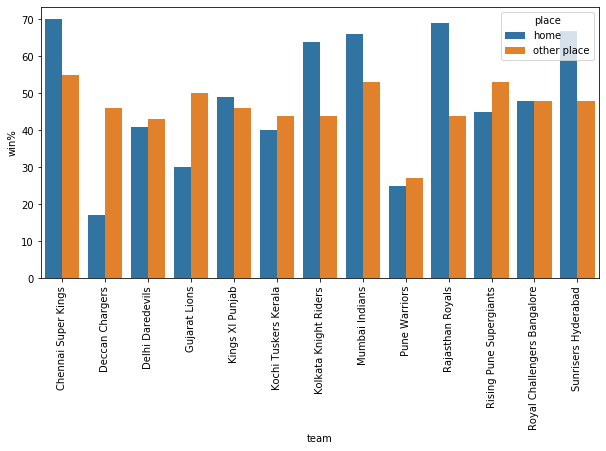

In [40]:
plt.figure(figsize=(10,5))
chart = sns.barplot(data = matches_win_percs,
           x='team',
           y='win%',
           hue='place')
chart.set_xticklabels(rotation=90,labels=matches_win_percs['team'])
chart

## Venue Statistics

### Dismissals vs Venue

In [41]:
dismissal_and_venue = overall_data[['venue', 'dismissal_kind', 'id']].groupby(['venue', 'dismissal_kind']).count()
dismissal_and_venue = dismissal_and_venue['id'].groupby(level=0,group_keys=False).nlargest(3)
dismissal_and_venue = dismissal_and_venue.reset_index()
dismissal_and_venue = dismissal_and_venue.rename(columns={"id":"dismissal_count"})
dismissal_and_venue

venue dismissal_kind  \
0                                Barabati Stadium         caught   
1                                Barabati Stadium         bowled   
2                                Barabati Stadium        run out   
3                               Brabourne Stadium         caught   
4                               Brabourne Stadium         bowled   
..                                            ...            ...   
100  Vidarbha Cricket Association Stadium, Jamtha         bowled   
101  Vidarbha Cricket Association Stadium, Jamtha        run out   
102                              Wankhede Stadium         caught   
103                              Wankhede Stadium         bowled   
104                              Wankhede Stadium        run out   

     dismissal_count  
0                 42  
1                 24  
2                 10  
3                 70  
4                 27  
..               ...  
100                7  
101                5  
102              432  
103              117  
104               59  

[105 rows x 3 columns]

In [42]:
matches_per_venue = matches[['venue','id']].groupby('venue').count()
matches_per_venue = matches_per_venue.reset_index()
matches_per_venue = matches_per_venue.rename(columns={"id":"matches_count"})
matches_per_venue

overall_dismissal_data = pd.merge(dismissal_and_venue, matches_per_venue, on='venue', how='inner')
overall_dismissal_data

venue dismissal_kind  \
0                                Barabati Stadium         caught   
1                                Barabati Stadium         bowled   
2                                Barabati Stadium        run out   
3                               Brabourne Stadium         caught   
4                               Brabourne Stadium         bowled   
..                                            ...            ...   
100  Vidarbha Cricket Association Stadium, Jamtha         bowled   
101  Vidarbha Cricket Association Stadium, Jamtha        run out   
102                              Wankhede Stadium         caught   
103                              Wankhede Stadium         bowled   
104                              Wankhede Stadium        run out   

     dismissal_count  matches_count  
0                 42              7  
1                 24              7  
2                 10              7  
3                 70             11  
4                 27             11  
..               ...            ...  
100                7              3  
101                5              3  
102              432             57  
103              117             57  
104               59             57  

[105 rows x 4 columns]

In [43]:
import plotly.express as px
df = overall_dismissal_data

fig = px.scatter(df, x="matches_count", y="dismissal_count",
	         color="venue", size="dismissal_count",
                 hover_name="dismissal_kind", log_x=True, size_max=60)
fig.show()

### Runs vs Venue

In [44]:
runs_data = overall_data[['venue', 'total_runs']].groupby(['venue']).sum()
runs_data = runs_data.reset_index()
runs_data = pd.merge(matches_per_venue,runs_data,on='venue',how="inner")


In [45]:
df = runs_data

fig = px.scatter(df, x="matches_count", y="total_runs",
	         color="venue", size="total_runs",
                 hover_name="venue", log_x=True, size_max=60)
fig.show()